In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

/Users/michelpenke/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


API keys can be found here: https://twelvedata.com/account/api-keys

In [2]:
# Twelve Data API endpoint and API key
BASE_URL = "https://api.twelvedata.com/time_series"
API_KEY = "ce1509cfffde4bd5923ebbdd21d8d22b"

# Set up parameters for the API request
symbol = "DJT"
interval = "1h"
end_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")

params = {
    "symbol": symbol,
    "interval": interval,
    "apikey": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

response = requests.get(BASE_URL, params=params)

             datetime      open      high       low    close    volume
4 2024-11-04 11:30:00  30.60000  31.88000  30.60000  31.8248   6892371
3 2024-11-04 12:30:00  31.84640  34.23000  31.51010  33.3450  17755194
2 2024-11-04 13:30:00  33.33010  35.76000  33.30000  35.3699  21072002
1 2024-11-04 14:30:00  35.36090  35.47000  32.62000  33.8300  16682376
0 2024-11-04 15:30:00  33.82000  35.10000  33.30000  34.3100   8662570


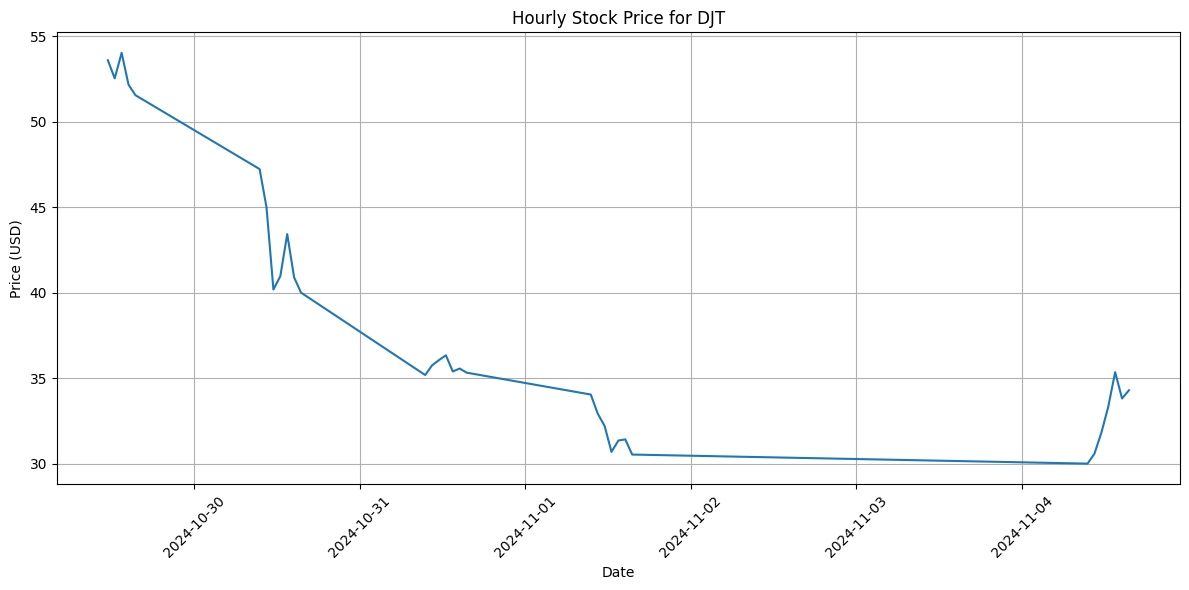

Current price: $34.31
Highest price: $54.04
Lowest price: $30.02
Average price: $38.31


In [3]:
if response.status_code == 200:
    data = response.json()
    
    if "values" in data:
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data["values"])
        
        # Convert datetime and numeric columns
        df["datetime"] = pd.to_datetime(df["datetime"])
        df["close"] = pd.to_numeric(df["close"])
        
        # Sort the DataFrame by date
        df = df.sort_values("datetime")
        
        print(df.tail())

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df["datetime"], df["close"])
        plt.title(f'Hourly Stock Price for {symbol}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print some statistics
        print(f"Current price: ${df['close'].iloc[-1]:.2f}")
        print(f"Highest price: ${df['close'].max():.2f}")
        print(f"Lowest price: ${df['close'].min():.2f}")
        print(f"Average price: ${df['close'].mean():.2f}")

    else:
        print("No data found in the response")
else:
    print(f"Error: {response.status_code}")
    print(response.text)
